___

<a href='http://www.pieriandata.com'> <img src="resources/pierianlogo.jpg" /></a>
___

# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
from plotly.offline import iplot,plot,init_notebook_mode,download_plotlyjs
import cufflinks as cf

In [3]:
cf.go_offline()
init_notebook_mode(connected=False)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [7]:
neighbors = pd.read_csv("resources/KNN_Project_Data")

In [8]:
neighbors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


## Check if there is any missing data 

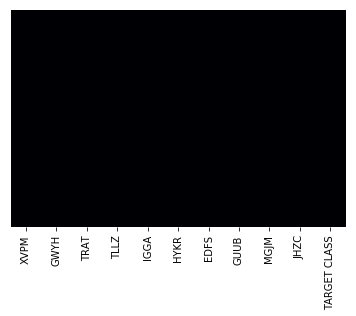

In [11]:
sns.heatmap(neighbors.isnull(), yticklabels=False, cbar=False, cmap="magma")

## Standardize the data -> without the target data series (Target Class) 

In [12]:
neighbors.head(3)

XVPM        GWYH         TRAT        TLLZ         IGGA         HYKR  \
0  1636.670614  817.988525  2565.995189  358.347163   550.417491  1618.870897   
1  1013.402760  577.587332  2644.141273  280.428203  1161.873391  2084.107872   
2  1300.035501  820.518697  2025.854469  525.562292   922.206261  2552.355407   

          EDFS        GUUB         MGJM         JHZC  TARGET CLASS  
0  2147.641254  330.727893  1494.878631   845.136088             0  
1   853.404981  447.157619  1193.032521   861.081809             1  
2   818.676686  845.491492  1968.367513  1647.186291             1

In [16]:
scalar = StandardScaler()

In [17]:
scalar.fit(neighbors.drop("TARGET CLASS", axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Use the .transform() method to transform the features to a scaled version

In [18]:
features = scalar.transform(neighbors.drop("TARGET CLASS", axis = 1))

In [23]:
feat_frame = pd.DataFrame(features, columns= neighbors.columns[:-1])

In [25]:
feat_frame.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

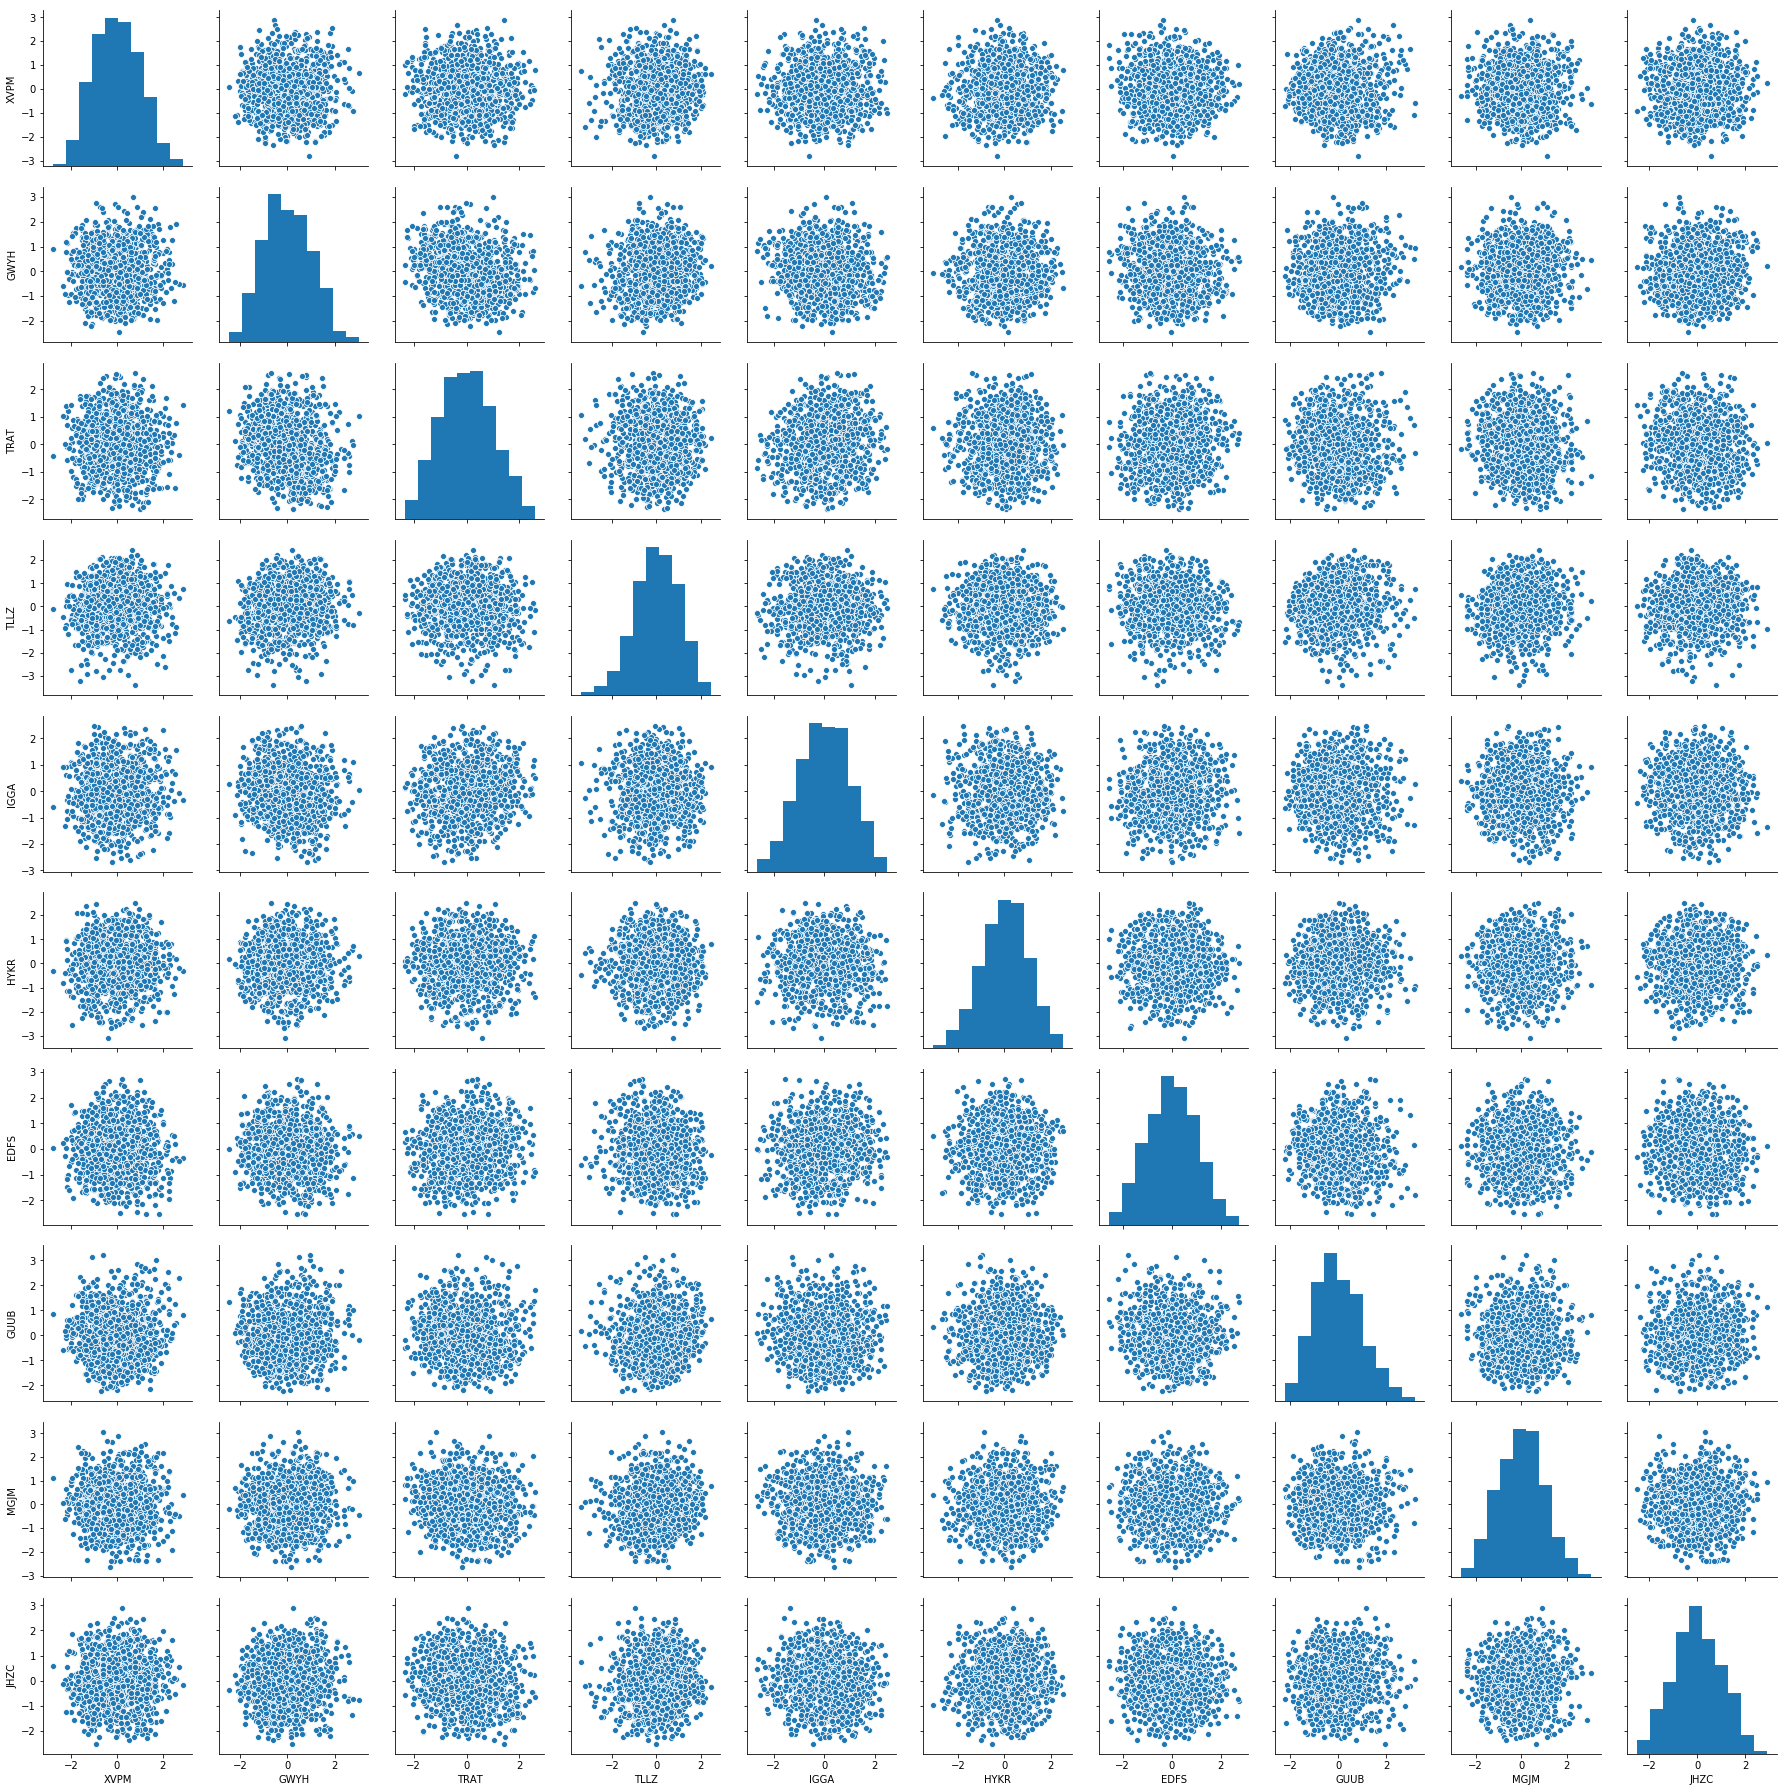

In [26]:
sns.pairplot(feat_frame)

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [27]:
X = feat_frame
y = neighbors["TARGET CLASS"]

In [28]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
kn = KNeighborsClassifier(n_neighbors=1)

In [30]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [32]:
predictions = kn.predict(X_test)

** Create a confusion matrix and classification report.**

In [33]:
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[110  36]
 [ 47 107]]


              precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [36]:
import numpy as np

In [40]:
error_rate = []
for k in range(1,40):
    kN = KNeighborsClassifier(n_neighbors=k)
    kN.fit(X_train, y_train)
    pred = kN.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

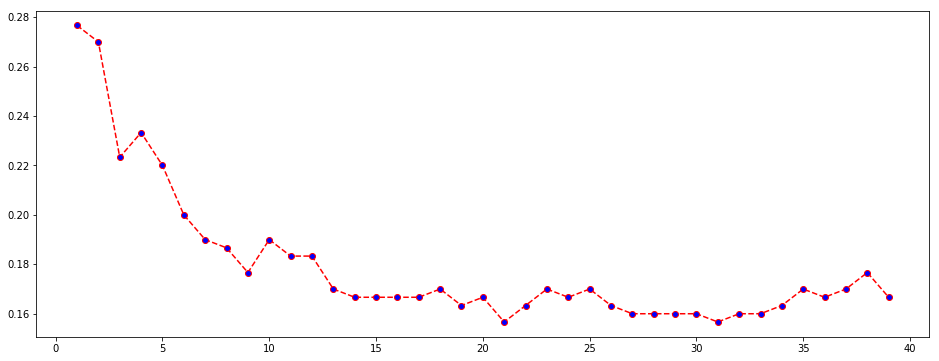

In [47]:
plt.figure(figsize=(16,6))
plt.plot(range(1,40), error_rate, ls = "--", c = "red", marker = "o", mfc = "blue", ms = "6")

## Looks like a K value around 22 will gve us a lower error rate and better presicion

In [48]:
kneig = KNeighborsClassifier(n_neighbors=22)

In [49]:
kneig.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

In [50]:
preee = kneig.predict(X_test)

In [51]:
print(confusion_matrix(y_test, preee))
print("\n")
print(classification_report(y_test, preee))

[[128  18]
 [ 31 123]]


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.87      0.80      0.83       154

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



## Looks like we have a 10% increase in accuracy